In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Draw
import os

In [4]:
data = [("CHEMBL2380240", "Rottapharm" ),
        ("CHEMBL3351489", "Eisai" ),
        ("CHEMBL3352684", "Merck" ),
        ("CHEMBL3526050", "Actelion" ),
        ("CHEMBL3739366", "Heptares" )]

In [271]:
fps = []
docs = []
companies = []
mols_data_com = []
mols_data = []

for cid, company in data:
    sdf_file = os.path.join("/Users/yweilin/Downloads/", cid + ".sdf")
    mols = Chem.SDMolSupplier(sdf_file)
    mols_data_com.append(mols)
    for mol in mols:
        if mol is not None:
            mols_data.append(mol)
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
            arr = np.zeros((1,))
            DataStructs.ConvertToNumpyArray(fp, arr)
            docs.append(cid)
            companies.append(company)
            fps.append(arr)
fps = np.array(fps)
companies = np.array(companies)
docs = np.array(docs)

In [31]:
X_reduced[companies == 'Rottapharm']

(32, 2)

In [17]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(fps)

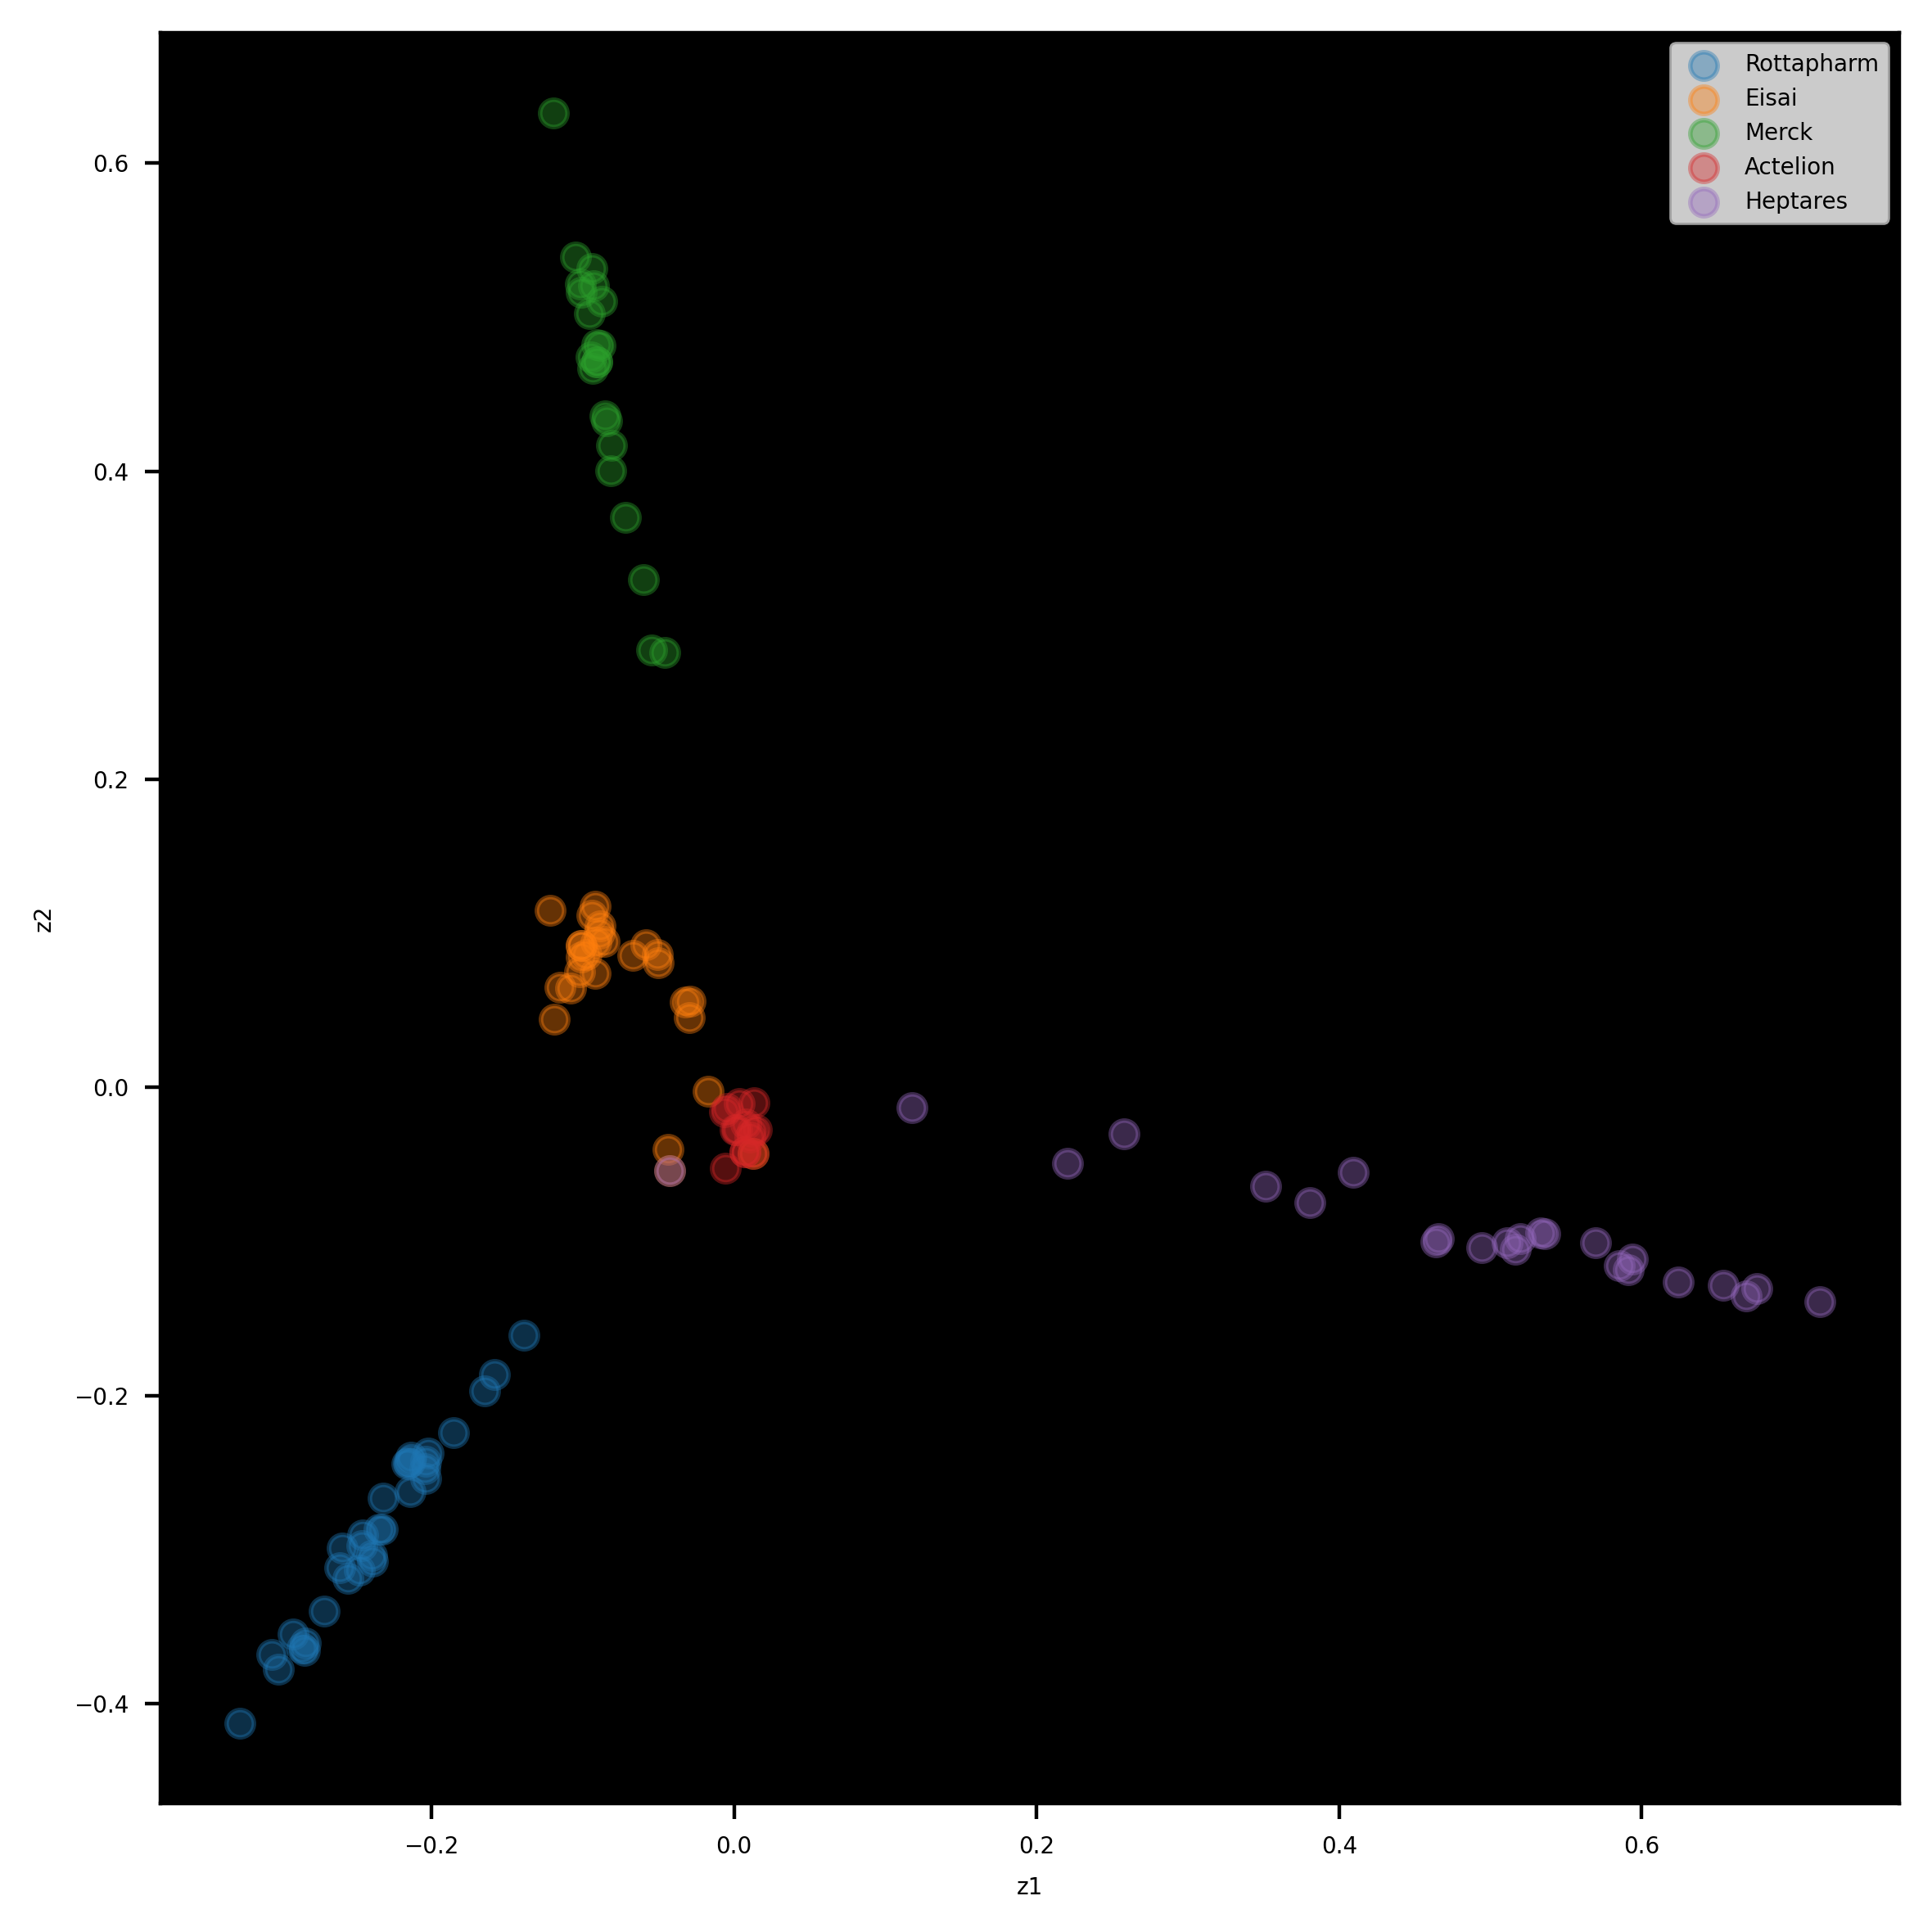

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

plt.figure(figsize=(6,6),dpi=400)
for i in range(len(data)):
    plt.scatter(X_reduced[companies == data[i][1]][:, 0],
                X_reduced[companies == data[i][1]][:, 1], label=data[i][1], alpha = 0.4)
    
plt.xlabel("z1", fontsize=5)
plt.ylabel("z2", fontsize=5)
plt.tick_params(labelsize=5)
plt.legend(fontsize=5)
plt.tight_layout()
ax = plt.gca()
ax.set_facecolor('black')
plt.show()

In [69]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=3, random_state=42)
X_reduced_lle = lle.fit_transform(fps)

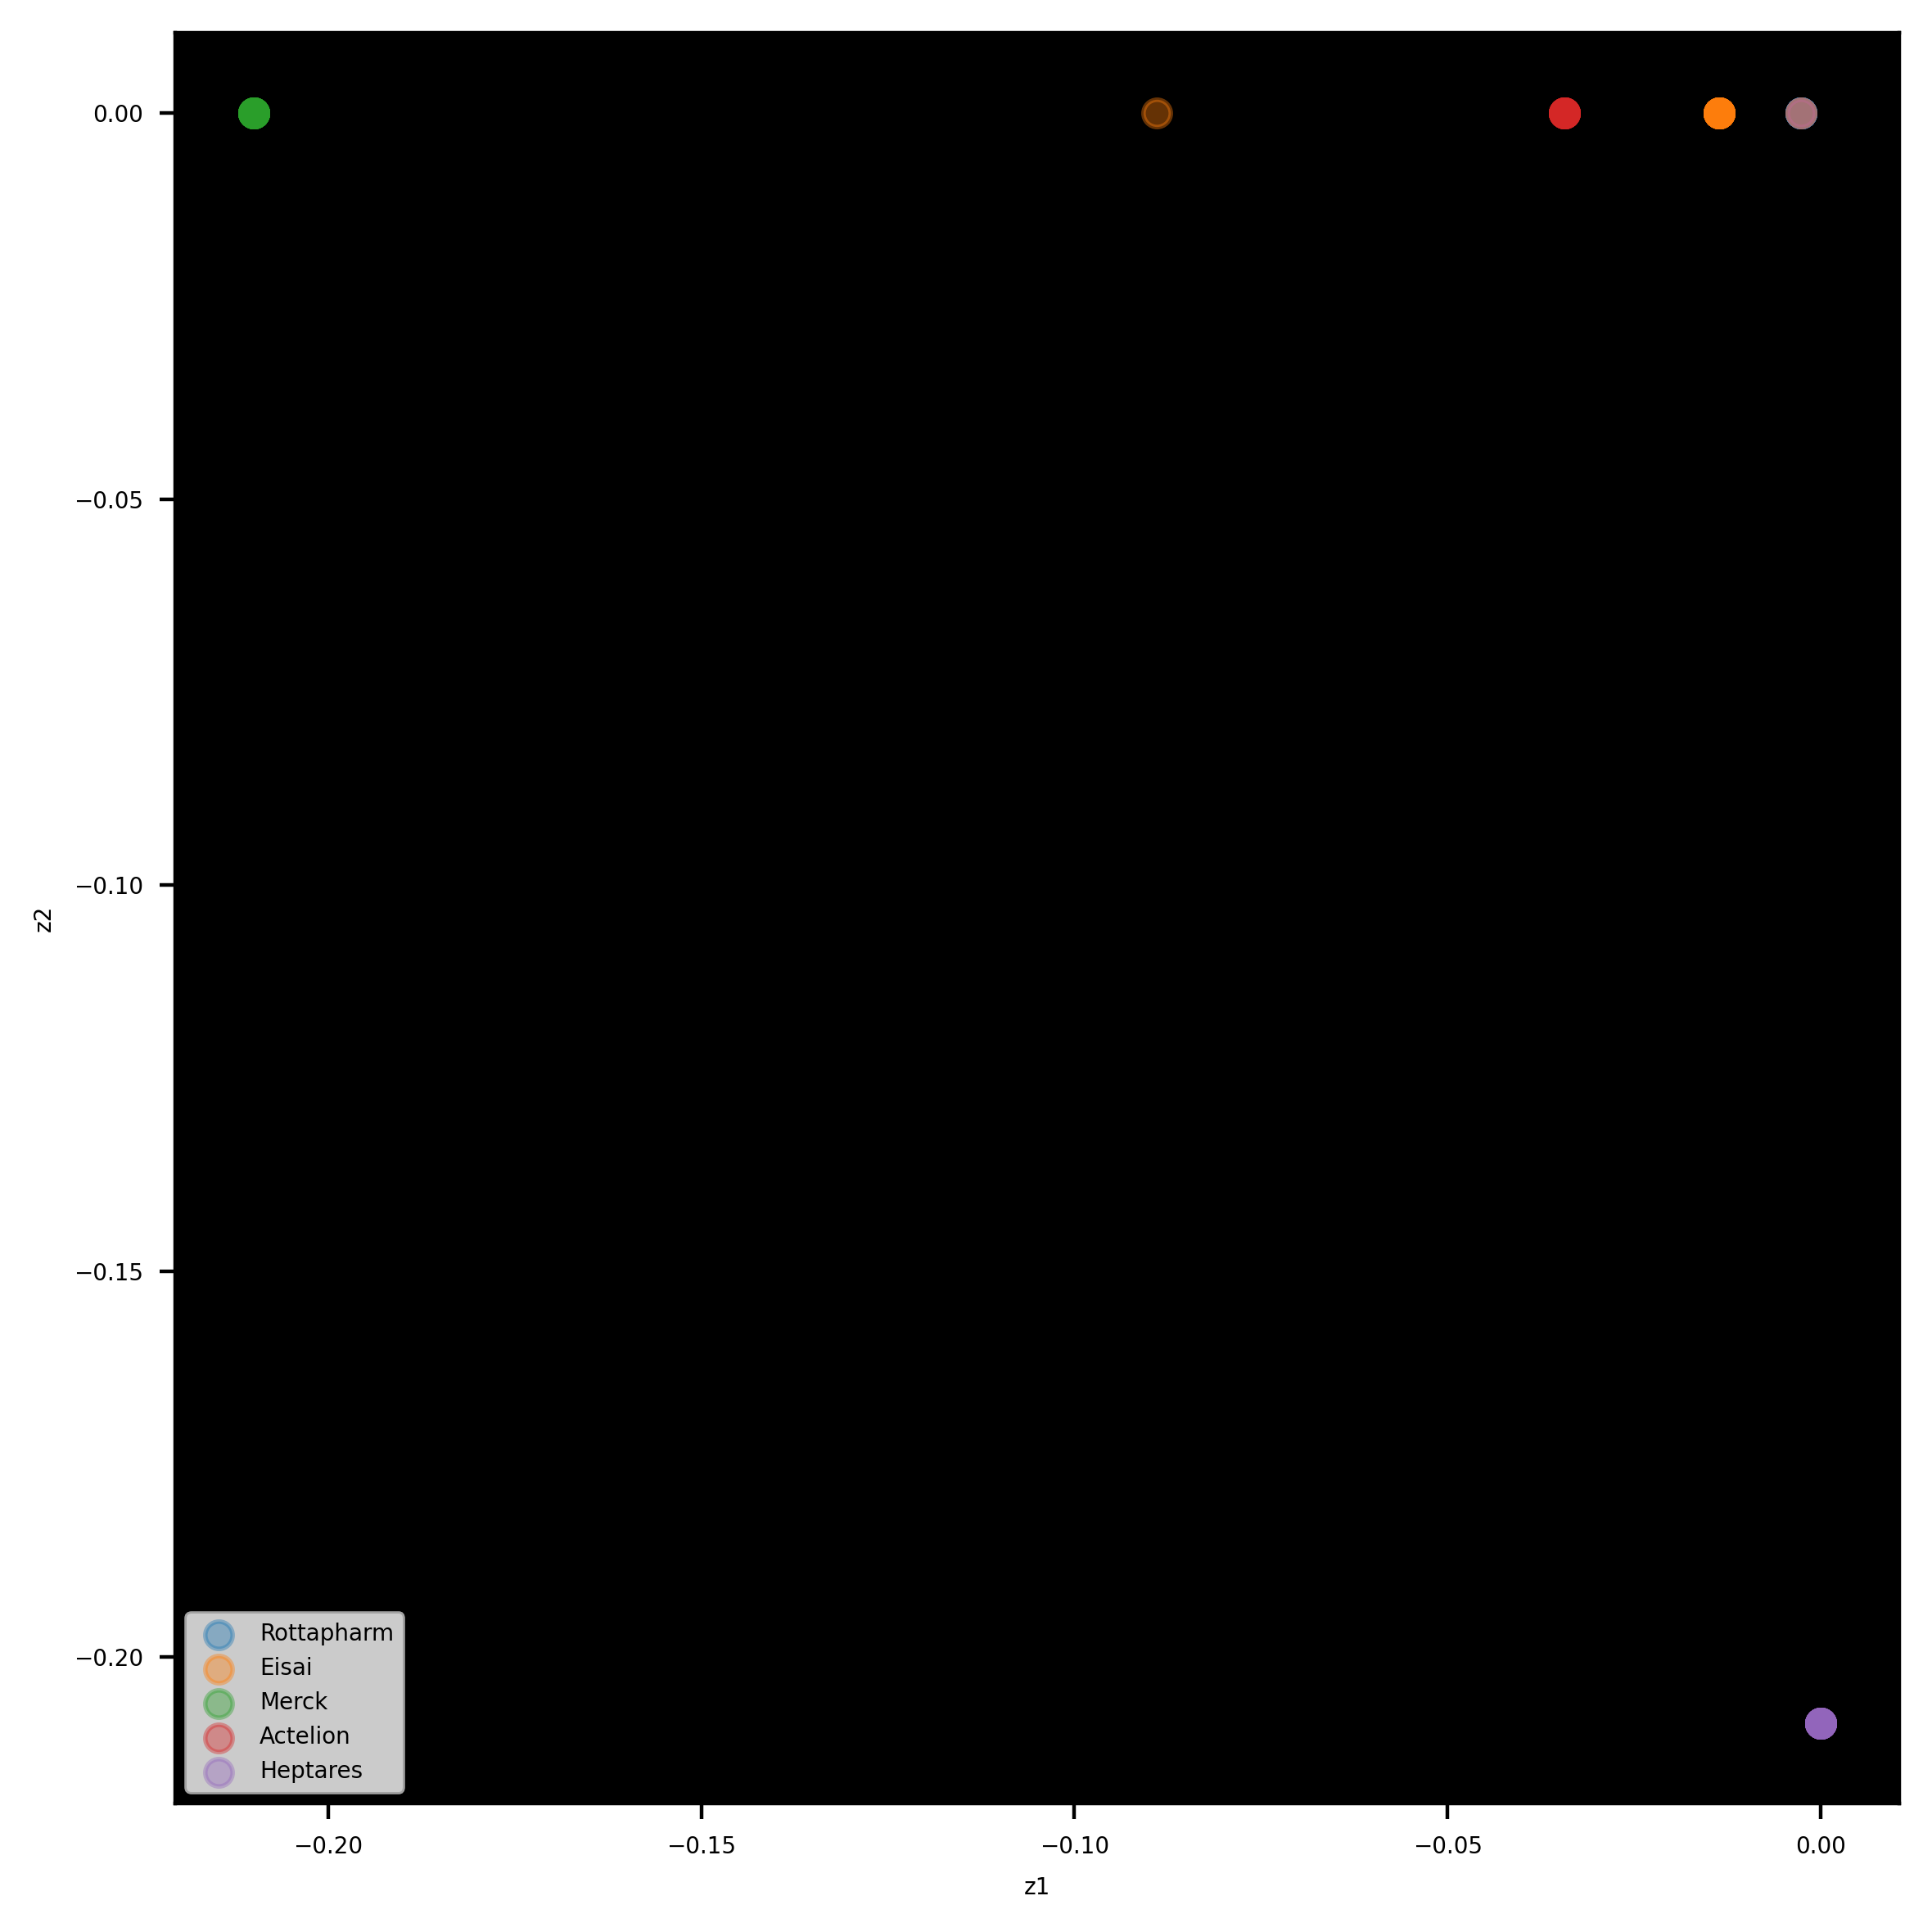

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

plt.figure(figsize=(6,6),dpi=400)
for i in range(len(data)):
    plt.scatter(X_reduced_lle[companies == data[i][1]][:, 0],
                X_reduced_lle[companies == data[i][1]][:, 1], label=data[i][1], alpha = 0.4)
    
plt.xlabel("z1", fontsize=5)
plt.ylabel("z2", fontsize=5)
plt.tick_params(labelsize=5)
plt.legend(fontsize=5)
plt.tight_layout()
ax = plt.gca()
ax.set_facecolor('black')
plt.show()

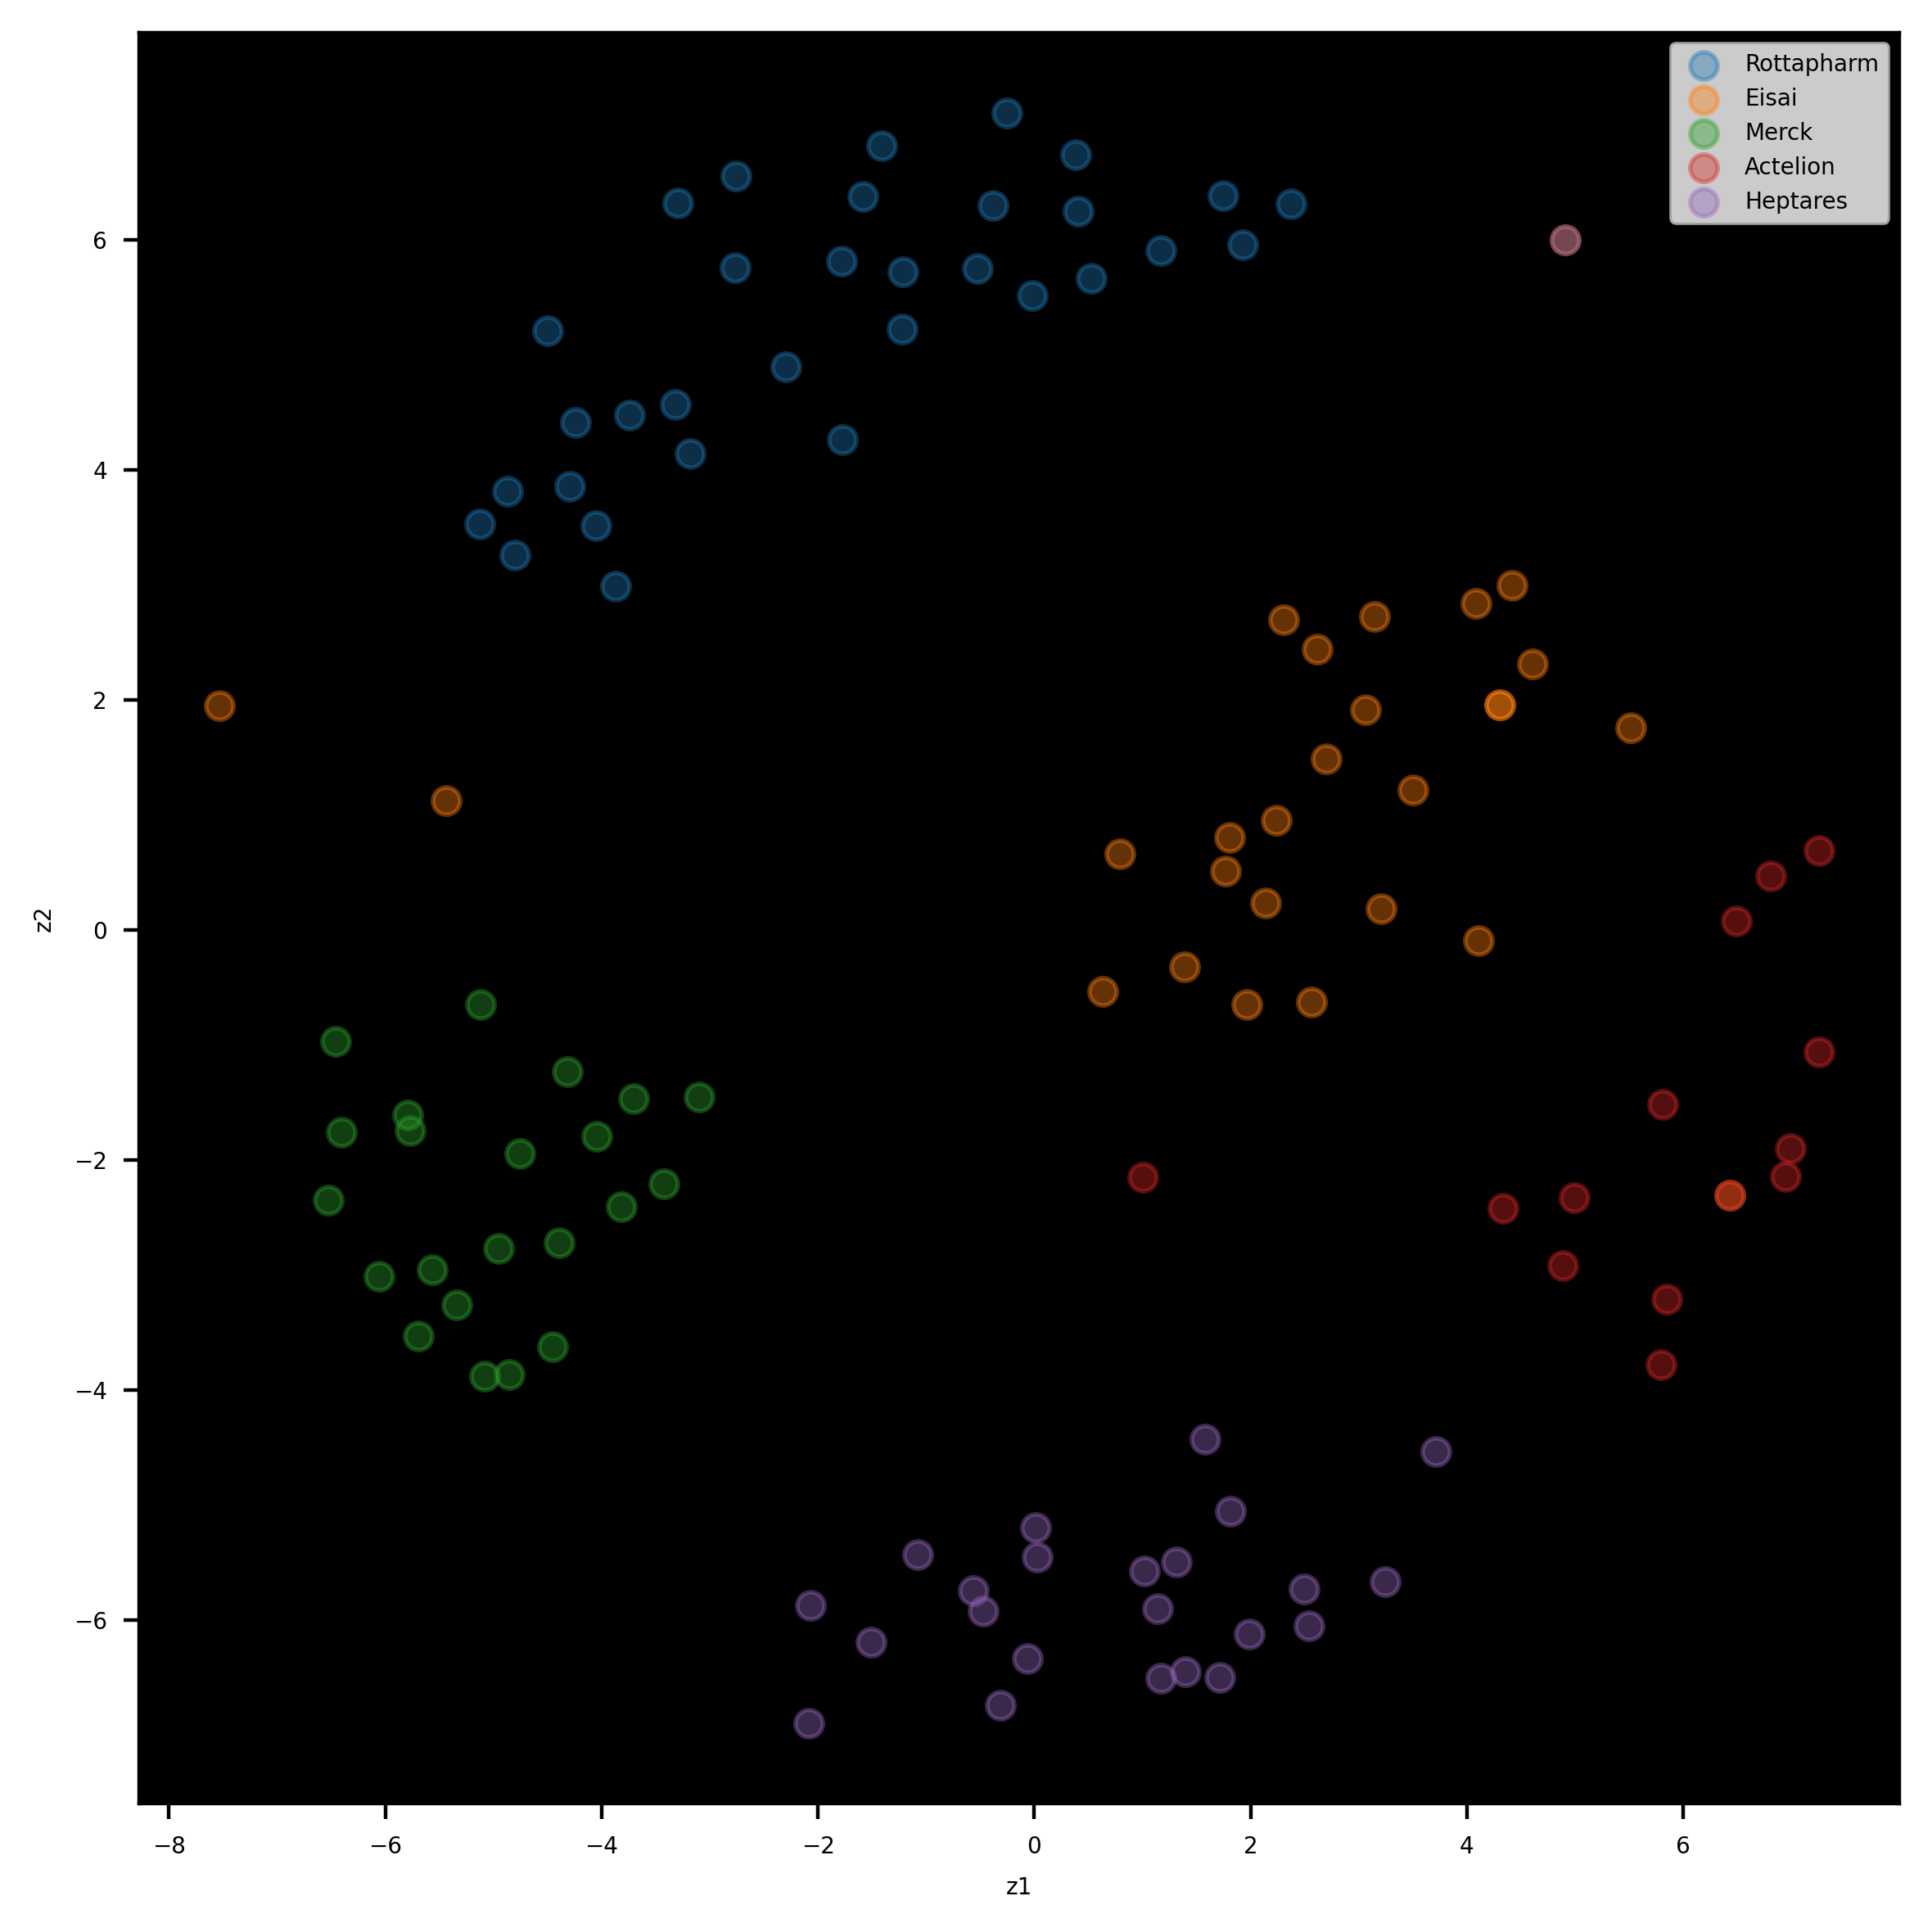

In [71]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(fps)

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

plt.figure(figsize=(6,6),dpi=400)
for i in range(len(data)):
    plt.scatter(X_reduced_mds[companies == data[i][1]][:, 0],
                X_reduced_mds[companies == data[i][1]][:, 1], label=data[i][1], alpha = 0.4)
    
plt.xlabel("z1", fontsize=5)
plt.ylabel("z2", fontsize=5)
plt.tick_params(labelsize=5)
plt.legend(fontsize=5)
plt.tight_layout()
ax = plt.gca()
ax.set_facecolor('black')
plt.show()

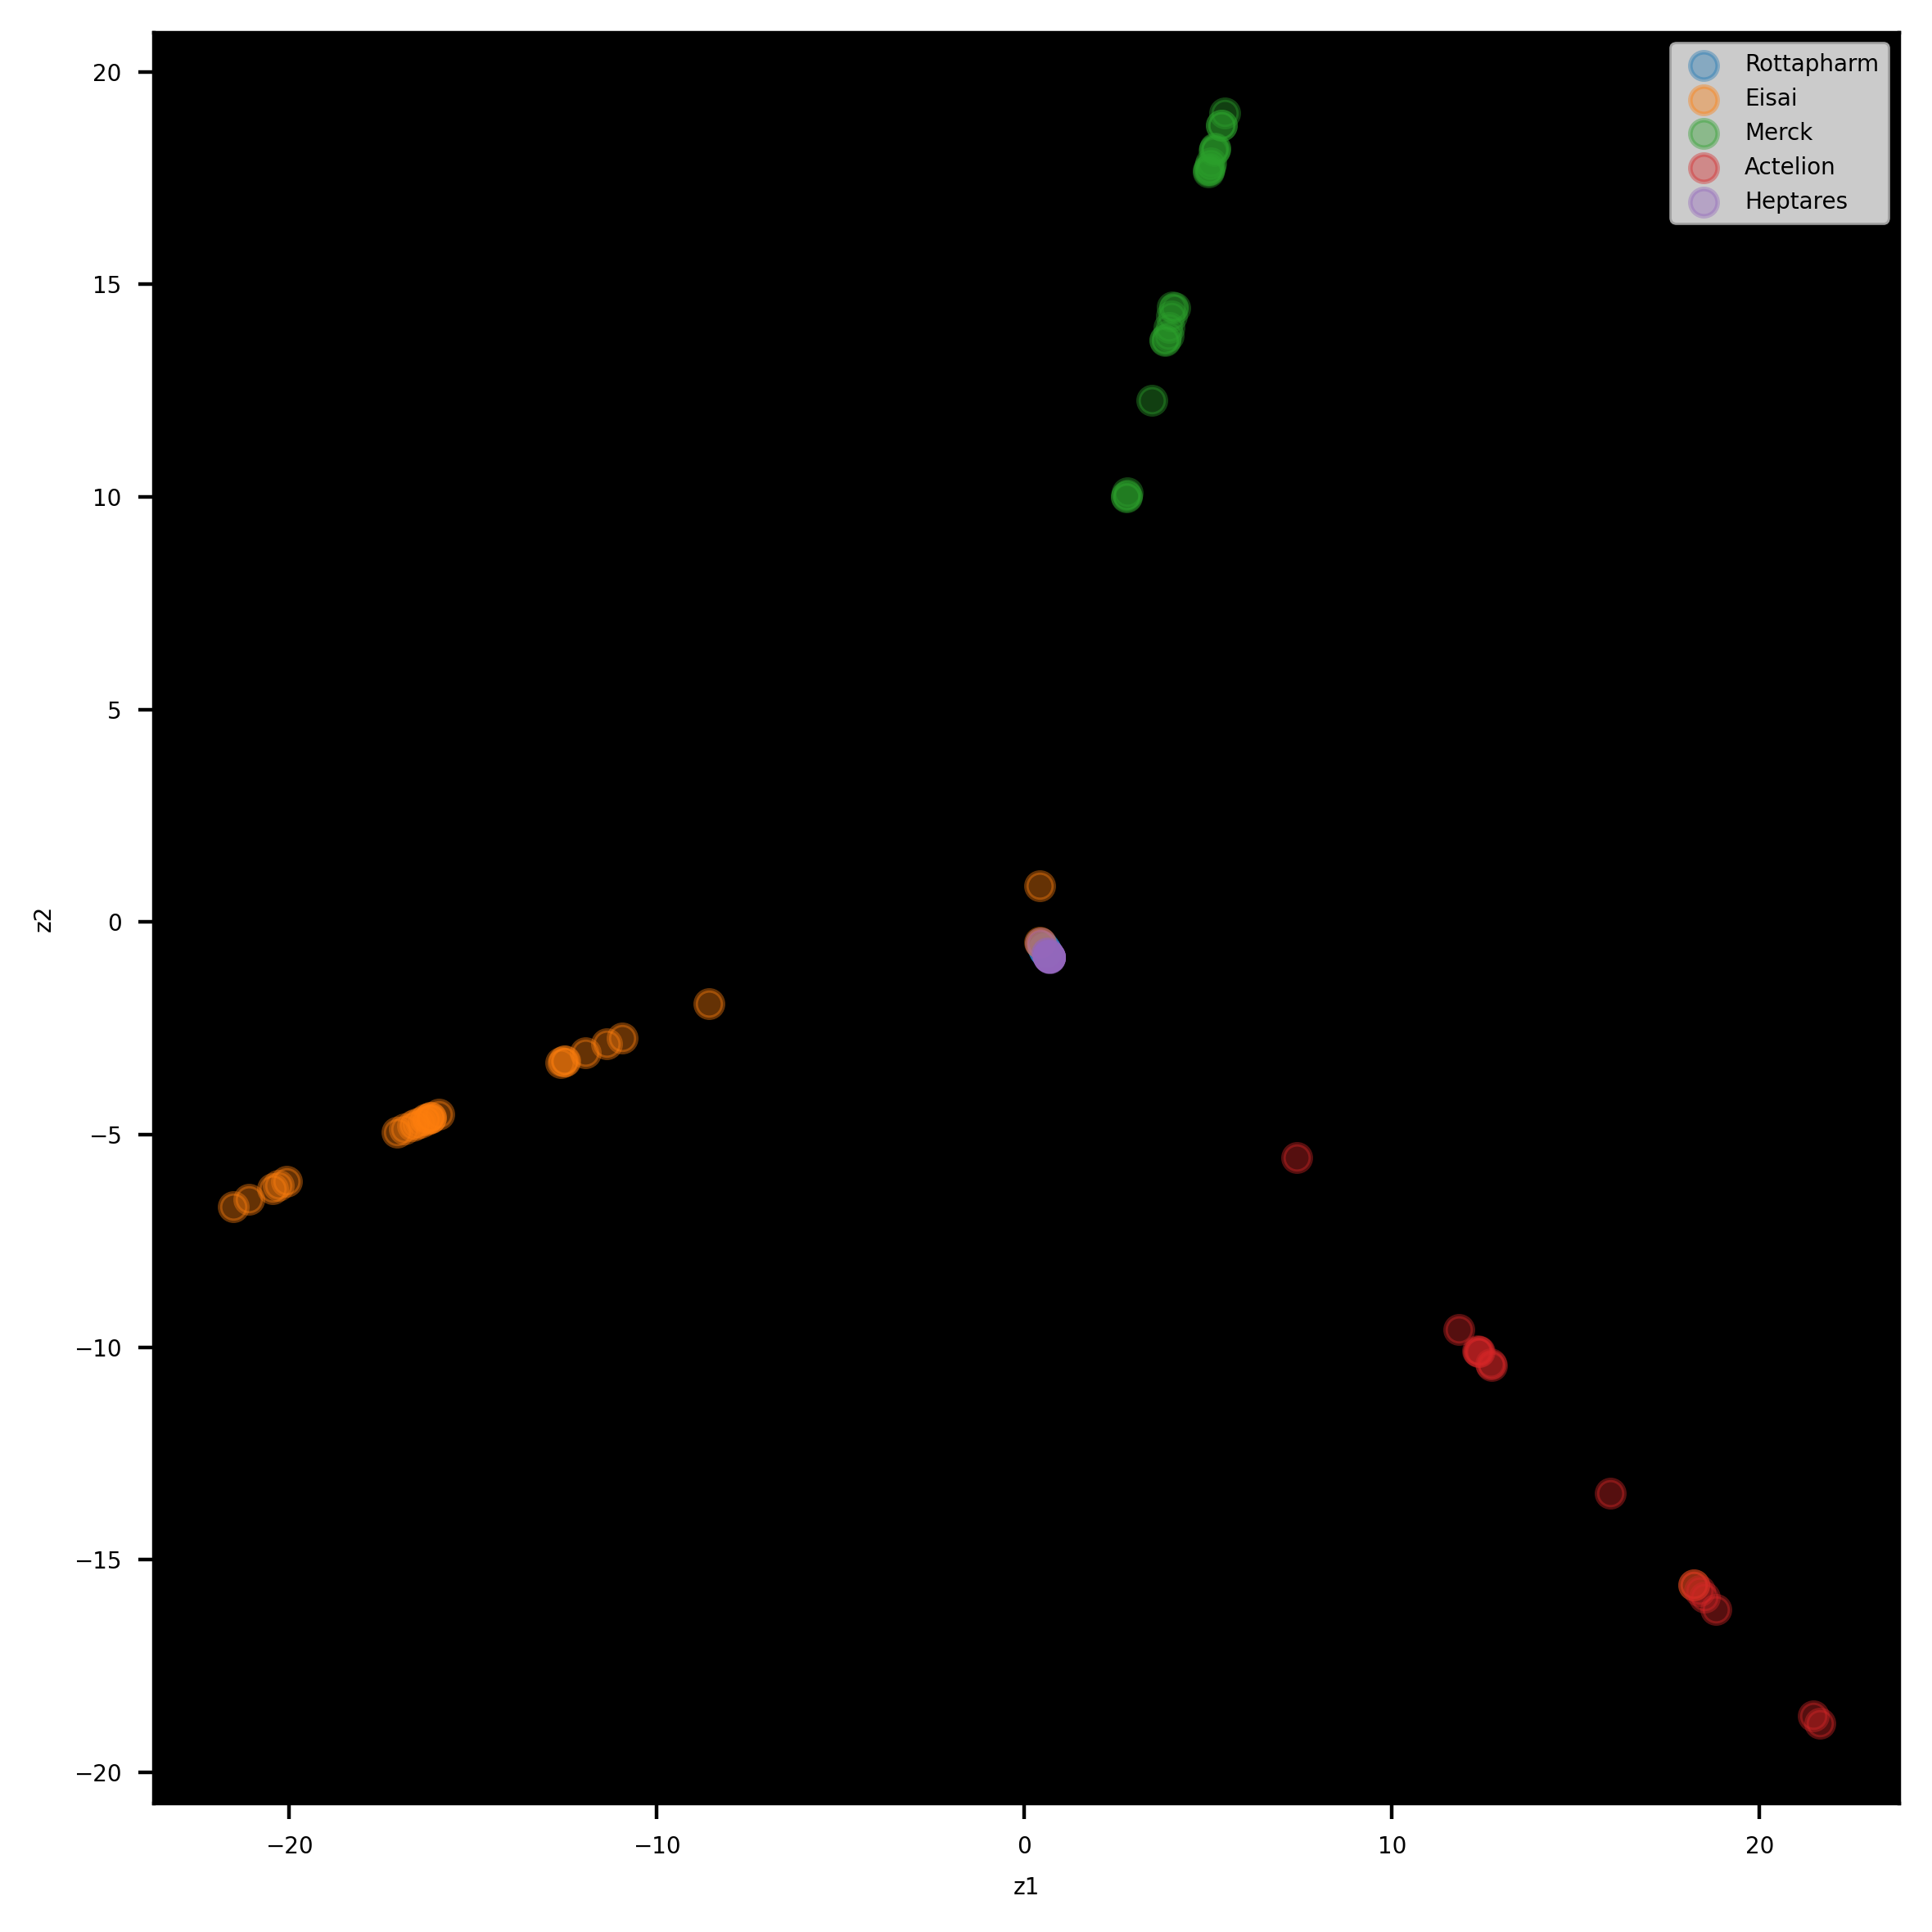

In [72]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(fps)

plt.figure(figsize=(6,6),dpi=400)
for i in range(len(data)):
    plt.scatter(X_reduced_isomap[companies == data[i][1]][:, 0],
                X_reduced_isomap[companies == data[i][1]][:, 1], label=data[i][1], alpha = 0.4)
    
plt.xlabel("z1", fontsize=5)
plt.ylabel("z2", fontsize=5)
plt.tick_params(labelsize=5)
plt.legend(fontsize=5)
plt.tight_layout()
ax = plt.gca()
ax.set_facecolor('black')
plt.show()

In [73]:
# clustering

In [74]:
from sklearn.cluster import KMeans

In [128]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=6)
y_pred = kmeans.fit_predict(fps)

In [129]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 0, 4], dtype=int32)

In [130]:
comp_label = []
for i in companies:
    if i == 'Rottapharm': comp_label.append(0)
    if i == 'Eisai': comp_label.append(1)
    if i == 'Merck': comp_label.append(2)
    if i == 'Actelion': comp_label.append(3)
    if i == 'Heptares': comp_label.append(4)

In [131]:
from sklearn.metrics import accuracy_score
accuracy_score(np.array(kmeans.labels_), comp_label)

0.957983193277311

In [234]:
kmeans = KMeans(n_clusters=k, random_state=6)
y_pred_mds = kmeans.fit_predict(X_reduced_mds)
y_pred_mds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2], dtype=int32)

In [235]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

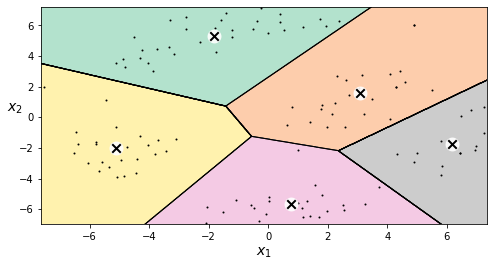

In [237]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X_reduced_mds)
plt.show()

In [238]:
kmeans.inertia_

496.54580819454765

In [240]:
kmeans.score(X_reduced_mds)

-496.5458081945477

In [241]:
kmeans.cluster_centers_

array([[-1.83503818,  5.29225459],
       [ 3.08004314,  1.57600273],
       [ 0.75125707, -5.6647471 ],
       [-5.10815523, -2.00545983],
       [ 6.16326422, -1.76194634]])

In [246]:
from scipy.spatial import distance

In [288]:
def get_center_mol(x, center_x, mols):
    c_distance = []
    for i in range(len(x)):
        c_distance.append(distance.euclidean(x[i], center_x))
    return mols[c_distance.index(min(c_distance))]

In [291]:
center_mols = []
for i in kmeans.cluster_centers_:
    center_mols.append(get_center_mol(X_reduced_mds, i, mols_data))

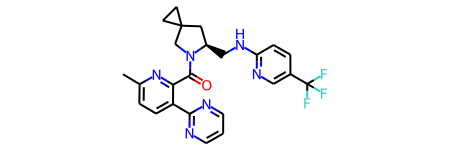

In [296]:
center_mols[0]

In [297]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_reduced_mds)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

No handles with labels found to put in legend.


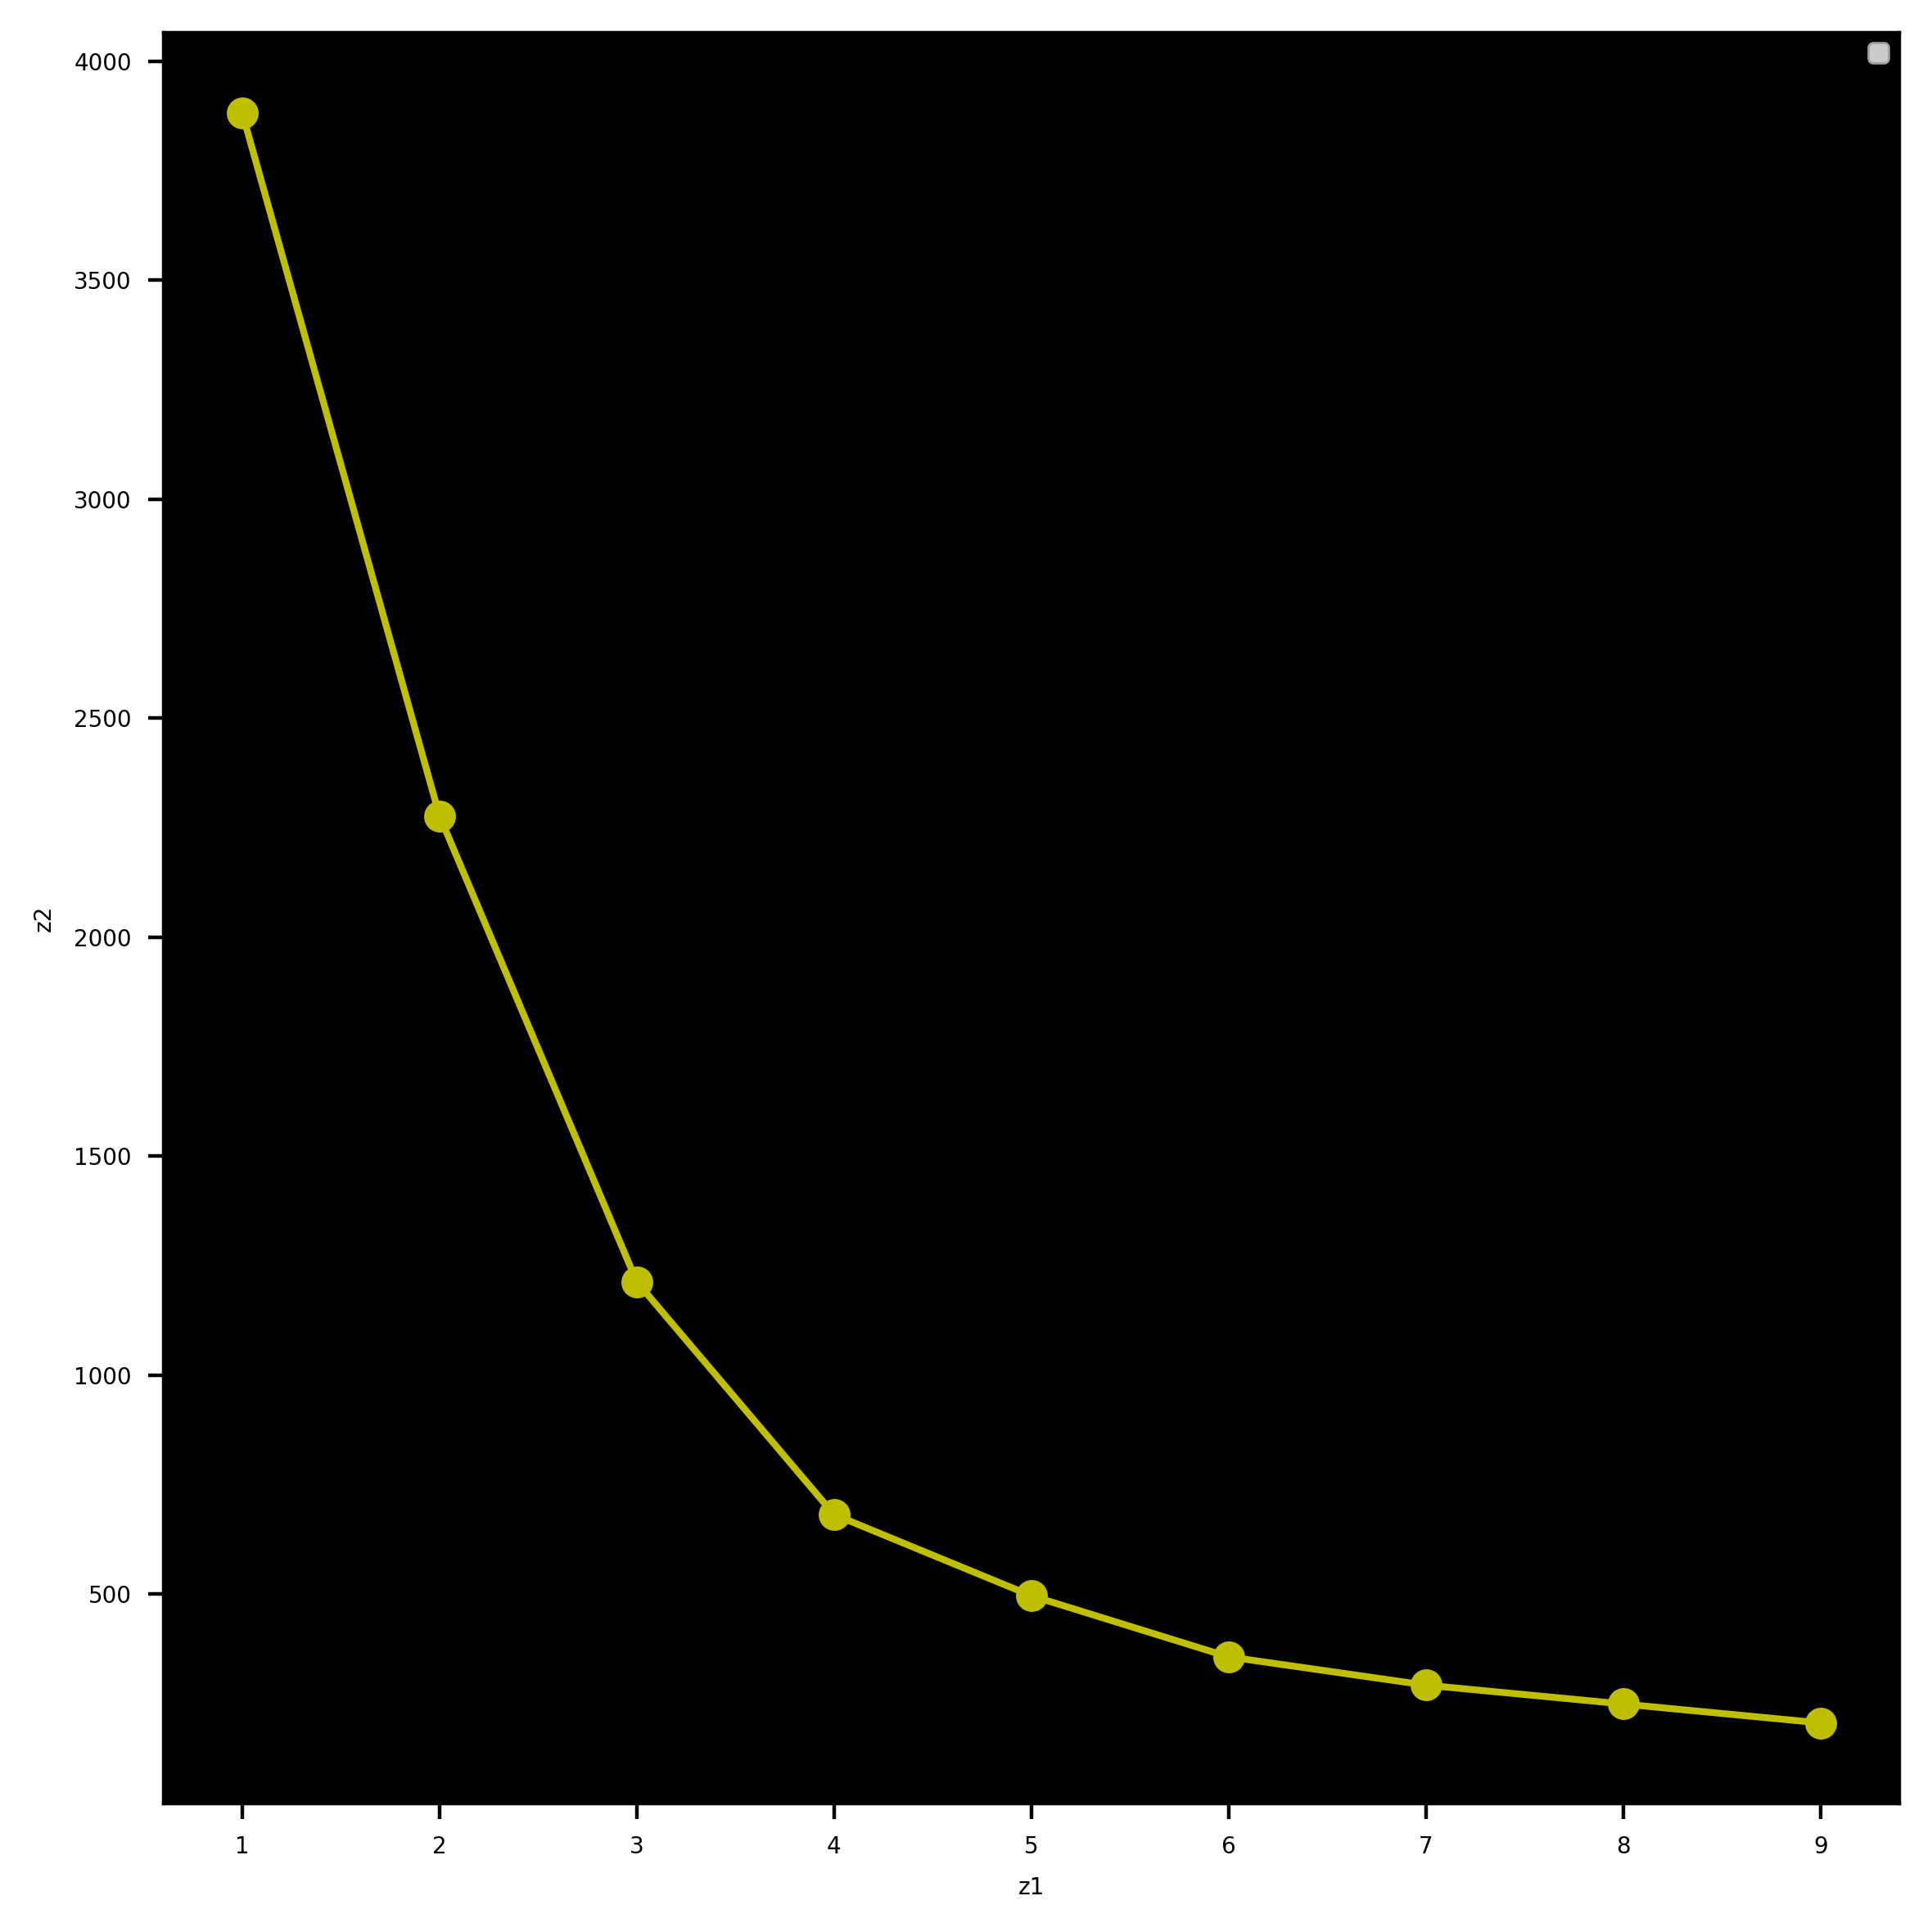

In [303]:
plt.figure(figsize=(6,6),dpi=400)
plt.plot(range(1, 10), inertias, "bo-", c='y')
plt.xlabel("z1", fontsize=5)
plt.ylabel("z2", fontsize=5)
plt.tick_params(labelsize=5)
plt.legend(fontsize=5)
plt.tight_layout()
ax = plt.gca()
ax.set_facecolor('black')
plt.show()

In [305]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X_reduced_mds, model.labels_)
                     for model in kmeans_per_k[1:]]

No handles with labels found to put in legend.


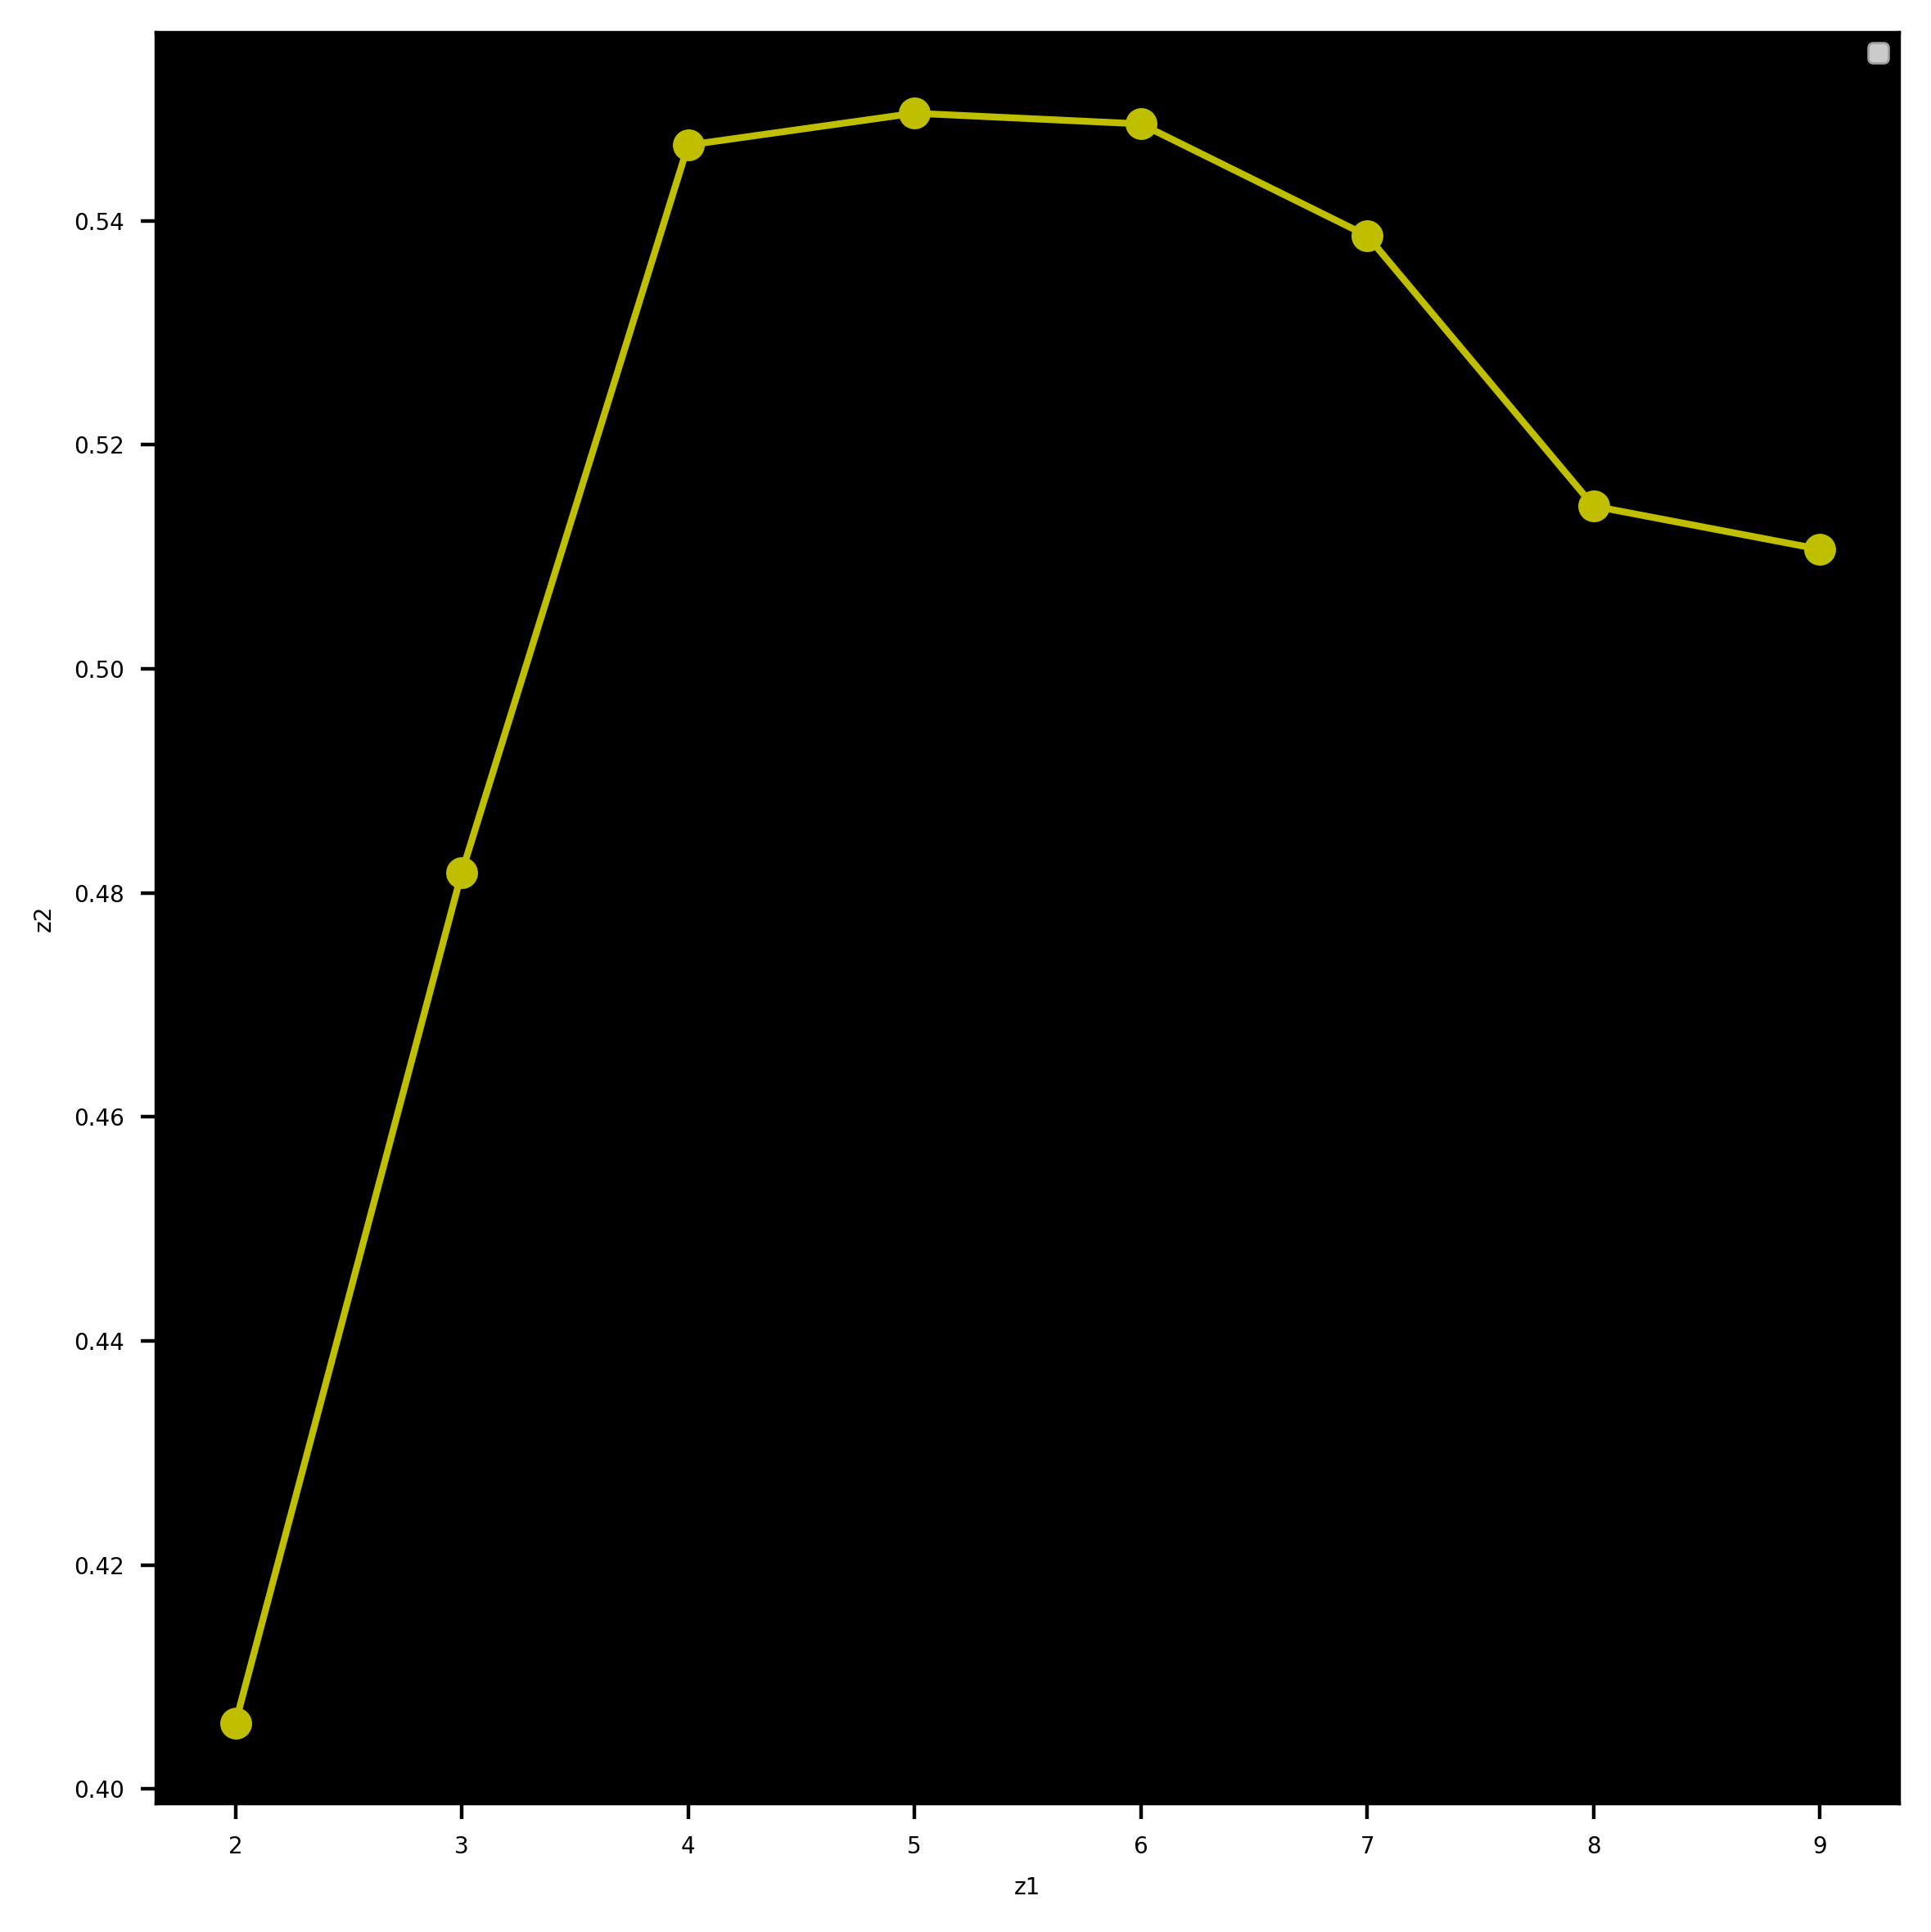

In [308]:
plt.figure(figsize=(6,6),dpi=400)
plt.plot(range(2, 10), silhouette_scores, "bo-", c='y')
plt.xlabel("z1", fontsize=5)
plt.ylabel("z2", fontsize=5)
plt.tick_params(labelsize=5)
plt.legend(fontsize=5)
plt.tight_layout()
ax = plt.gca()
ax.set_facecolor('black')
plt.show()